In [3]:
import tensorflow as tf
import os 
import pandas as pd 
import numpy as np
import os

import matplotlib.pyplot as plt
from PIL import Image

def list_dir(path):
    filenames = os.listdir(path)
    filenames.sort()
    return filenames

def load_image_pixels(imagepath, resolution):
    img         = Image.open(imagepath)
    img_resized = img.resize(resolution)
    return np.array(img_resized)

def onehot(idxs,cnt):
    return np.eye(cnt)[idxs]

resolution  = [100,100]

def flowers_init(resolution):
    path = 'flowers/'
    target_names = list_dir(path)

    images = []
    idxs   = []

    for dx, dname in enumerate(target_names):
        print("dname :", dname)
        subpath = path + '/' + dname
        print("subpath :", subpath)
        filenames = list_dir(subpath)
        print("filenames :\n", filenames[:3])

        for fname in filenames:
            if fname[-4:] != '.jpg':
                continue
            imagepath = os.path.join(subpath, fname)
            #print("imagepath : ", imagepath)
            pixels = load_image_pixels(imagepath, resolution)
            images.append(pixels)
            idxs.append(dx)

    xs = np.asarray(images, dtype = np.float32)           
    ys = onehot(idxs = idxs, cnt = len(target_names))
    
    return xs, ys   

In [4]:
xs, ys = flowers_init([100,100])

dname : daisy
subpath : flowers//daisy
filenames :
 ['100080576_f52e8ee070_n.jpg', '10140303196_b88d3d6cec.jpg', '10172379554_b296050f82_n.jpg']
dname : dandelion
subpath : flowers//dandelion
filenames :
 ['10043234166_e6dd915111_n.jpg', '10200780773_c6051a7d71_n.jpg', '10294487385_92a0676c7d_m.jpg']
dname : rose
subpath : flowers//rose
filenames :
 ['10090824183_d02c613f10_m.jpg', '102501987_3cdb8e5394_n.jpg', '10503217854_e66a804309.jpg']
dname : sunflower
subpath : flowers//sunflower
filenames :
 ['1008566138_6927679c8a.jpg', '1022552002_2b93faf9e7_n.jpg', '1022552036_67d33d5bd8_n.jpg']
dname : tulip
subpath : flowers//tulip
filenames :
 ['100930342_92e8746431_n.jpg', '10094729603_eeca3f2cb6.jpg', '10094731133_94a942463c.jpg']


In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [7]:
image_generator = ImageDataGenerator()

In [27]:
ImageDataGenerator(rotation_range = 30,
                  zoom_range = 0.5,
                  shear_range = 0.5,
                  width_shift_range = 0.3,
                  height_shift_range = 0.3,
                  horizontal_flip = True,
                  vertical_flip = True)

In [28]:
xs_norm = xs / 255.0

In [29]:
shuffle_map = np.arange(xs_norm.shape[0])
np.random.shuffle(shuffle_map)
print(shuffle_map)

[1171 3724 3874 ... 3199 4135 3607]


In [30]:
train_ratio = 0.8
test_begin_index = int(xs_norm.shape[0] * train_ratio)
print("test_begin_index : ", test_begin_index)

test_begin_index :  3453


In [31]:
# 독립변수를 학습과 테스트로 나눠주는 과정 
train_x = xs_norm[shuffle_map[:test_begin_index]]
test_x  = xs_norm[shuffle_map[test_begin_index:]]
# 종속변수를 학습과 테스트로 나눠주는 과정 
train_y = ys[shuffle_map[:test_begin_index]]
test_y  = ys[shuffle_map[test_begin_index:]]

print(train_x.shape)
print(test_x.shape)

print(train_y.shape)
print(test_y.shape)

(3453, 100, 100, 3)
(864, 100, 100, 3)
(3453, 5)
(864, 5)


In [13]:
augment_size = 100

x_augment = image_generator.flow(x = np.tile(A = train_x[0].reshape(100*100*3), reps = augment_size).reshape(-1,100,100,3), 
                                y= np.zeros(augment_size),
                               batch_size = augment_size,
                               shuffle=False).next()[0]

In [14]:
x_augment.shape

(100, 100, 100, 3)

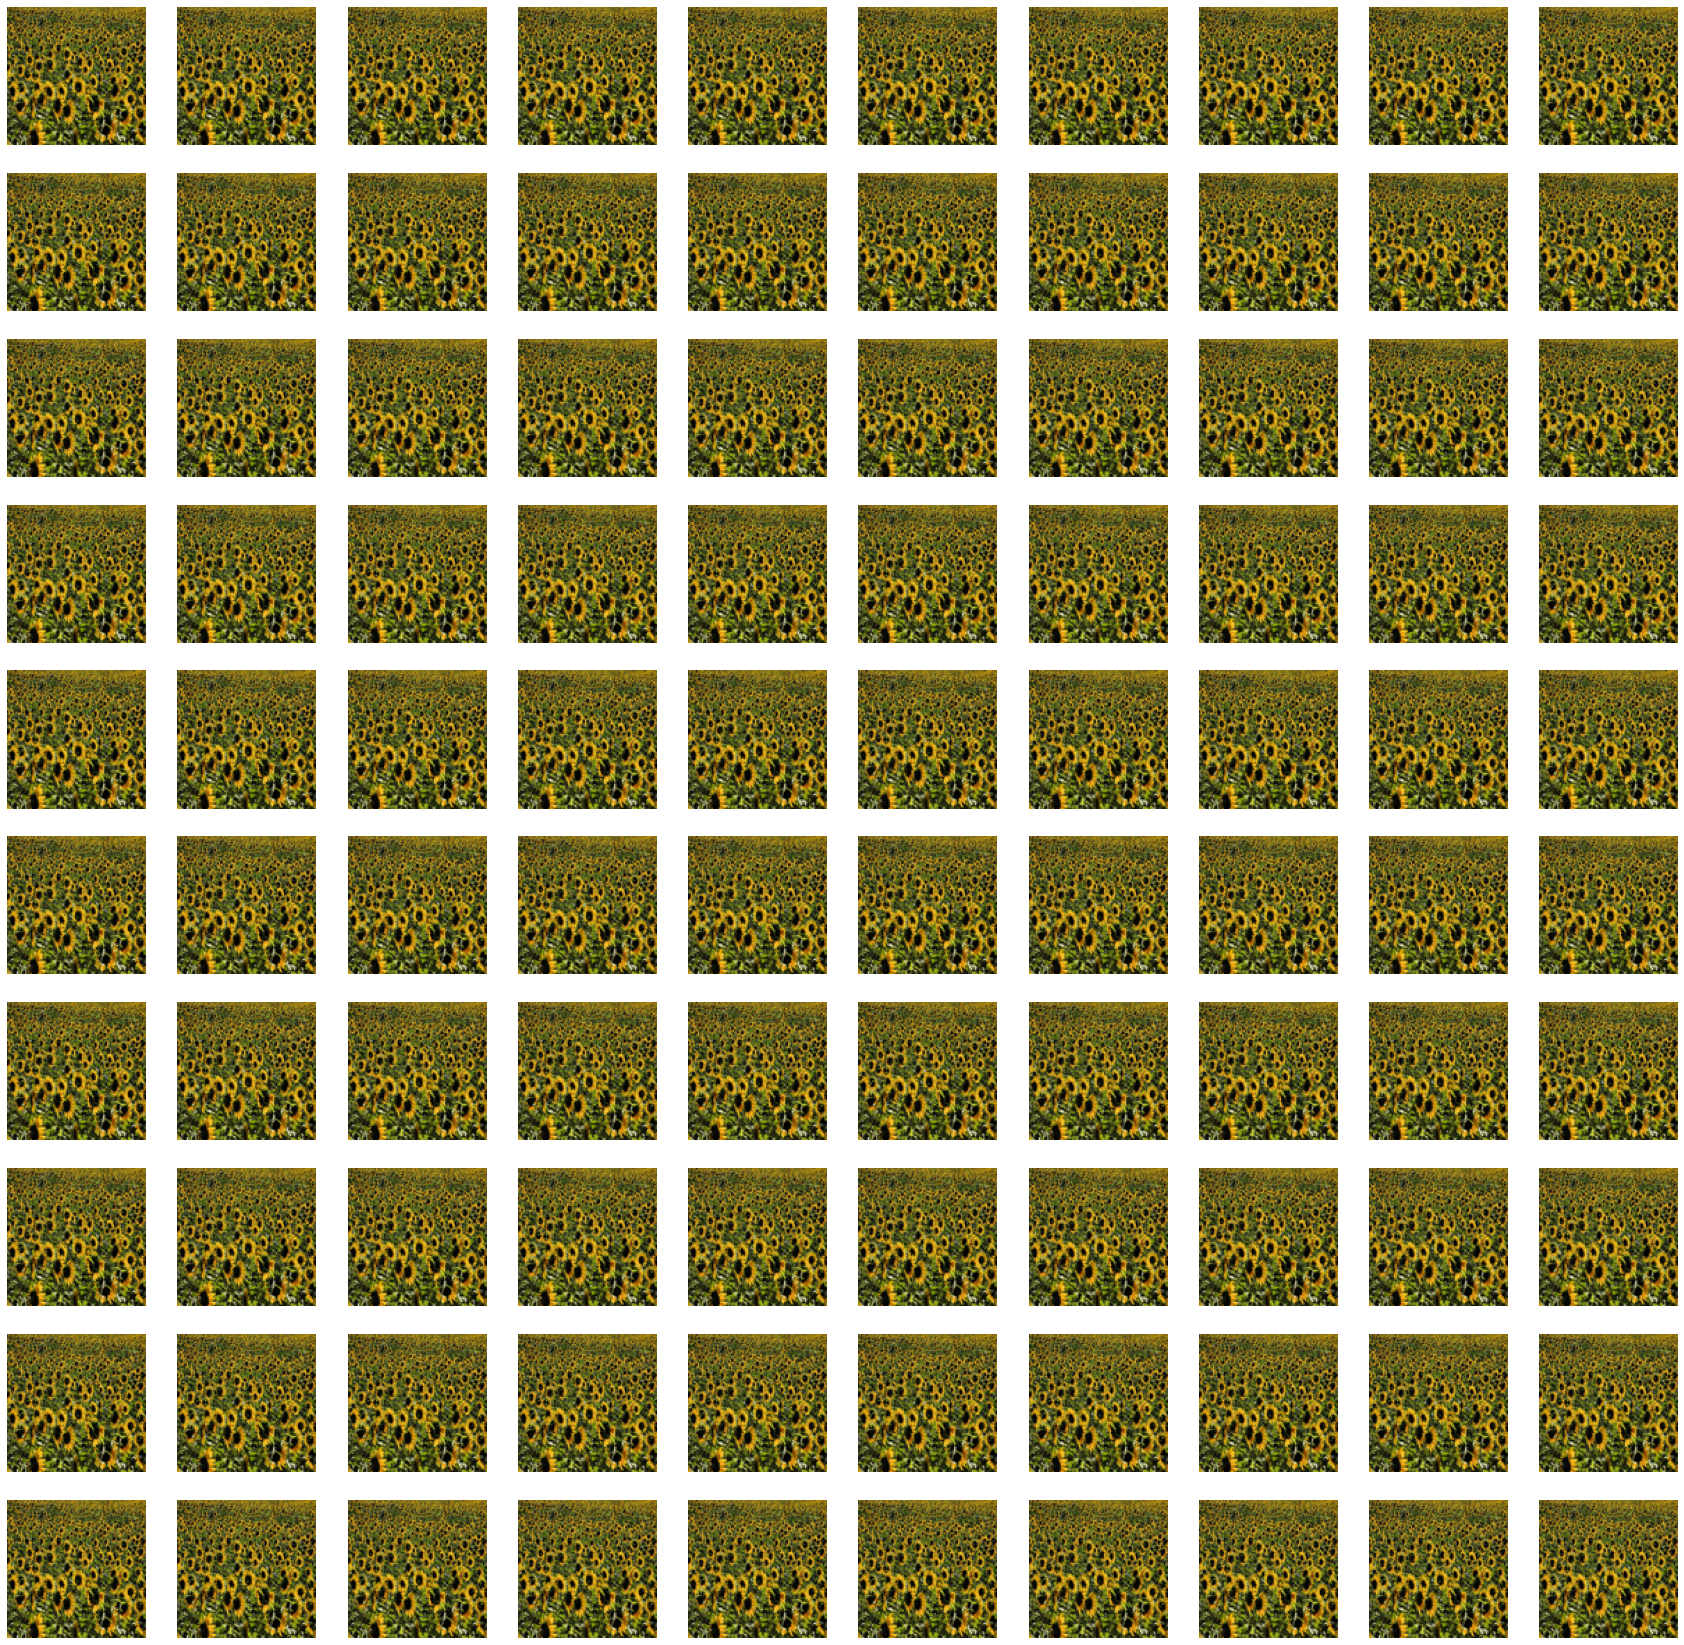

In [26]:
plt.figure(figsize=(30, 30))
for i in range(100):
    plt.subplot(10,10,i+1)
    plt.axis('off')
    i = np.random.choice(100, replace = False)
    plt.imshow(x_augment[i])
plt.show()

In [25]:
image_generator = ImageDataGenerator(rotation_range = 50,
                                     zoom_range = 0.75,
                                     shear_range = 0.75,
                                     width_shift_range = 0.5, 
                                     height_shift_range=0.5,
                                     horizontal_flip = True, 
                                     vertical_flip = True)

In [17]:
# 현재 데이터의 개수 
print(train_x.shape[0])

# 증폭 데이터의 개수 (50% 증폭)
augment_size = int(train_x.shape[0] * 0.5)
print(augment_size)

3453
1726


In [18]:
x_choice = np.random.choice(train_x.shape[0], size = augment_size, replace = False)
print(x_choice[:10])
print(x_choice.shape)

[1098  121 1379  550   86 3137 2182 1957 1681 1610]
(1726,)


In [19]:
# 복사본 데이터(독립변수)를 만들어 주는 과정
x_augmented = train_x[x_choice].copy()
print(x_augmented.shape)

# 복사본 데이터(종속변수)를 만들어 주는 과정
y_augmented = train_y[x_choice].copy()
print(y_augmented.shape)

(1726, 100, 100, 3)
(1726, 5)


In [20]:
# 복사본 데이터(독립변수)를 증폭시켜주는 과정.
x_augmented = image_generator.flow(x_augmented, 
                                   np.zeros(augment_size),
                                   batch_size = augment_size,
                                   shuffle = False).next()[0]

In [21]:
x_augmented.shape

(1726, 100, 100, 3)

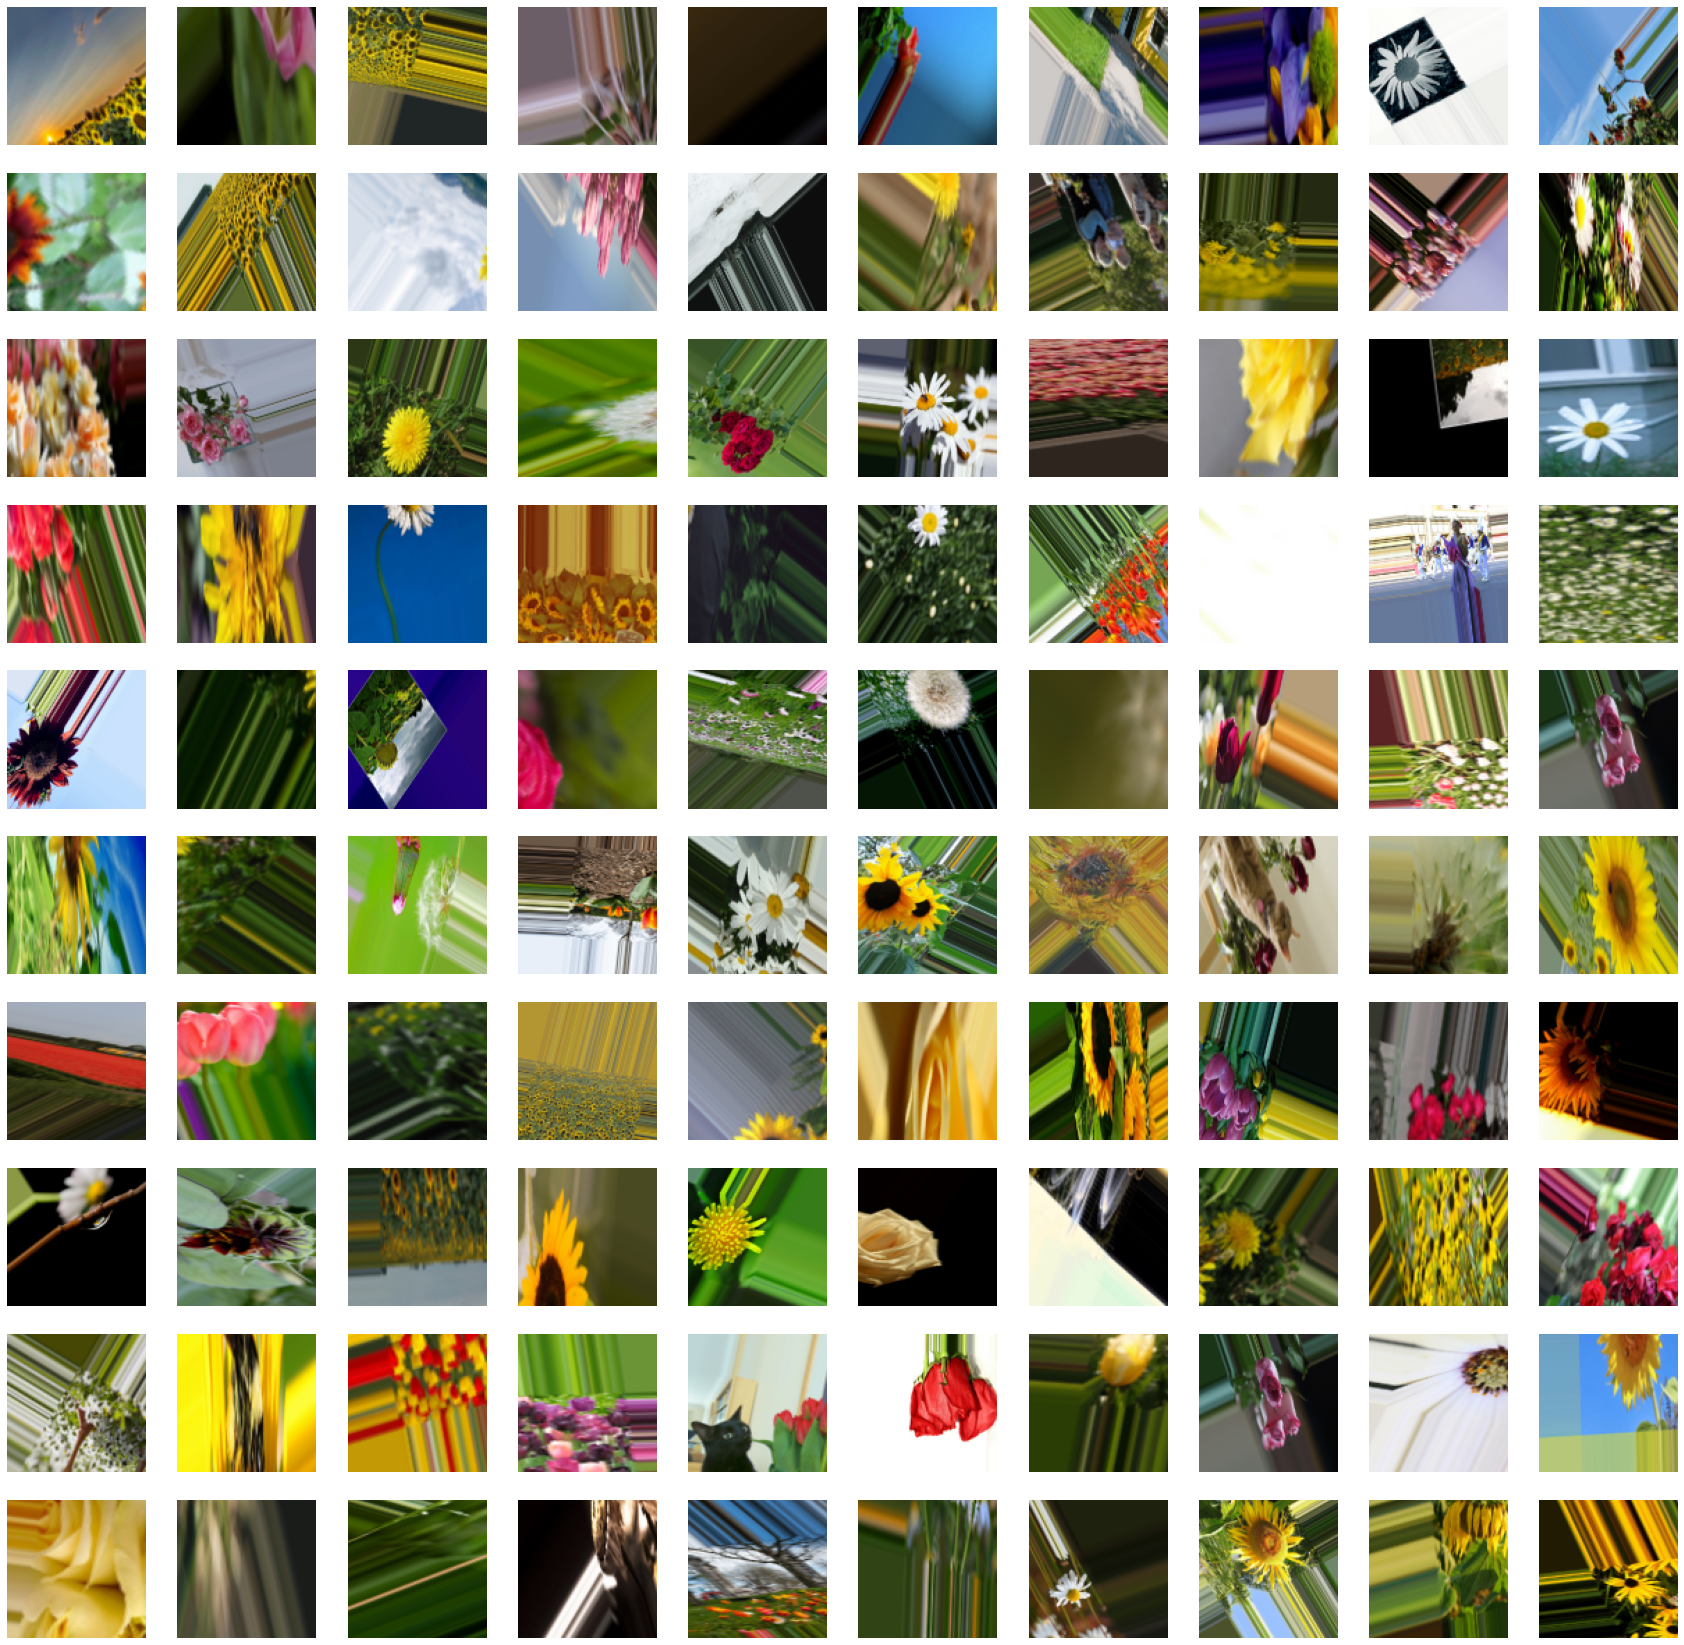

In [22]:
# 증폭된 데이터를 
plt.figure(figsize=(30,30))
for i in range(100):
    plt.subplot(10,10,i+1)
    plt.axis('off')
    i = np.random.choice(1726, replace = False)
    plt.imshow(x_augmented[i])
plt.show()

In [23]:
train_x = np.concatenate((train_x, x_augmented))
train_y = np.concatenate((train_y, y_augmented))

print(train_x.shape)
print(train_y.shape)

(5179, 100, 100, 3)
(5179, 5)
